# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9067 entries, 0 to 9066
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9067 non-null   int64  
 1   index           9067 non-null   int64  
 2   App             9067 non-null   object 
 3   Category        9067 non-null   object 
 4   Rating          9067 non-null   float64
 5   Reviews         9067 non-null   float64
 6   Size            9067 non-null   float64
 7   Installs        9067 non-null   int64  
 8   Type            9067 non-null   object 
 9   Content Rating  9067 non-null   object 
 10  Last Updated    9067 non-null   object 
 11  Date            9067 non-null   object 
 12  Month           9067 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 921.0+ KB


In [4]:
df.drop(['Unnamed: 0', 'index', 'Last Updated', 'App', 'Date'], axis=1, inplace=True)

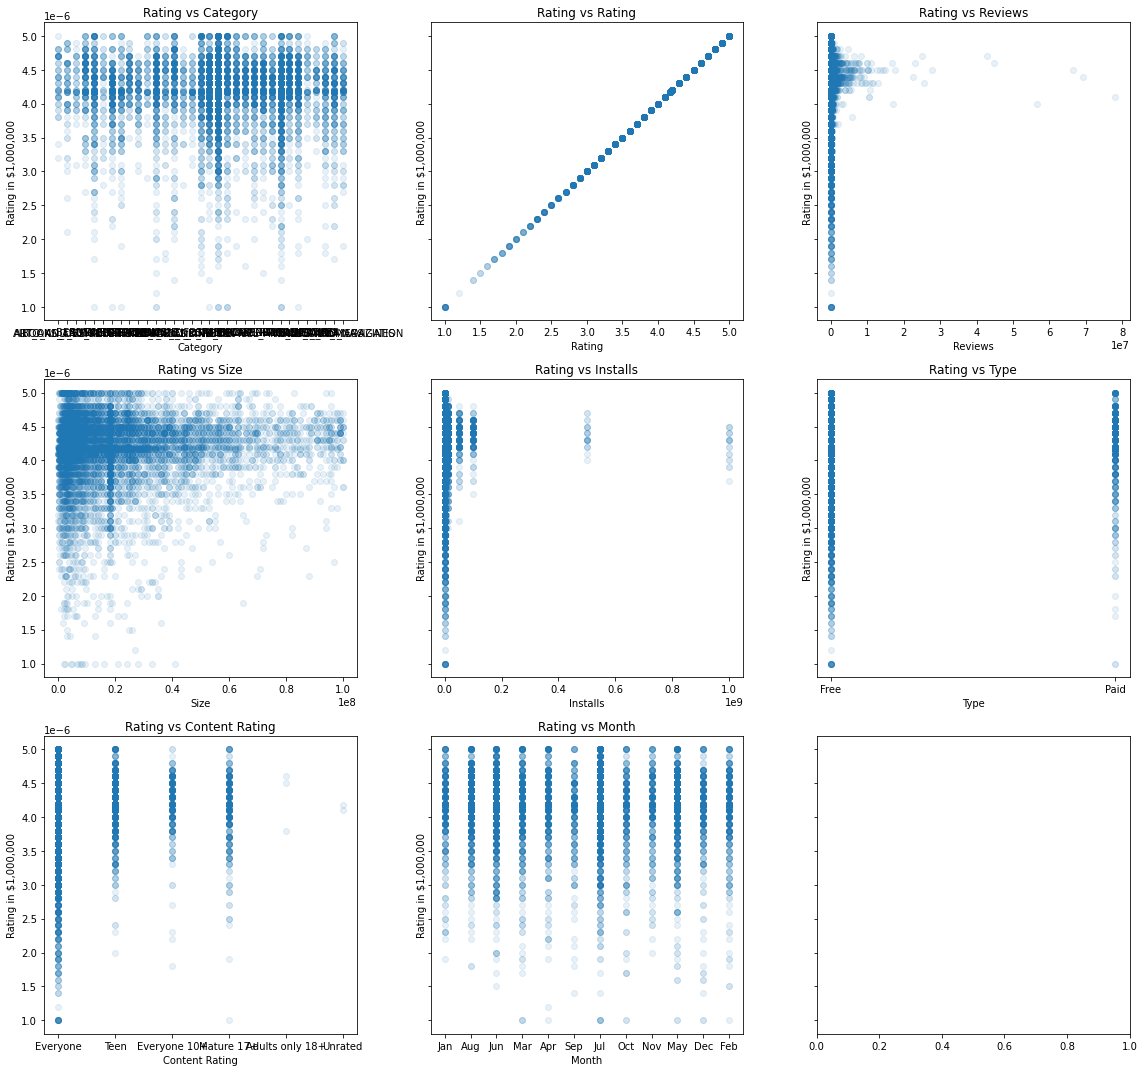

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['Rating'] / 1_000_000, label=column, alpha=.1)
    ax.set_title(f'Rating vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Rating in $1,000,000')

fig.tight_layout()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9067 entries, 0 to 9066
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9067 non-null   object 
 1   Rating          9067 non-null   float64
 2   Reviews         9067 non-null   float64
 3   Size            9067 non-null   float64
 4   Installs        9067 non-null   int64  
 5   Type            9067 non-null   object 
 6   Content Rating  9067 non-null   object 
 7   Month           9067 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 566.8+ KB


In [7]:
cats = df.select_dtypes(include='object')

In [8]:
cats_dummies = pd.get_dummies(cats, columns=['Category', 'Type', 'Content Rating', 'Month'], drop_first=True)

In [9]:
model_df = pd.concat((df, cats_dummies), axis=1)
model_df.drop(columns=['Category', 'Type', 'Content Rating', 'Month'], axis = 1, inplace=True)
model_df

,Rating,Reviews,Size,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,4.100000,159.0,1.900000e+07,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3.900000,967.0,1.400000e+07,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4.700000,87510.0,8.700000e+06,5000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4.500000,215644.0,2.500000e+07,50000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,4.300000,967.0,2.800000e+06,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062,4.500000,38.0,5.300000e+07,5000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9063,5.000000,4.0,3.600000e+06,100,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9064,4.172966,3.0,9.500000e+06,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9065,4.500000,114.0,1.811096e+07,1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9067 entries, 0 to 9066
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        9067 non-null   float64
 1   Reviews                       9067 non-null   float64
 2   Size                          9067 non-null   float64
 3   Installs                      9067 non-null   int64  
 4   Category_AUTO_AND_VEHICLES    9067 non-null   uint8  
 5   Category_BEAUTY               9067 non-null   uint8  
 6   Category_BOOKS_AND_REFERENCE  9067 non-null   uint8  
 7   Category_BUSINESS             9067 non-null   uint8  
 8   Category_COMICS               9067 non-null   uint8  
 9   Category_COMMUNICATION        9067 non-null   uint8  
 10  Category_DATING               9067 non-null   uint8  
 11  Category_EDUCATION            9067 non-null   uint8  
 12  Category_ENTERTAINMENT        9067 non-null   uint8  
 13  Cat

In [11]:
model_df.columns = model_df.columns.str.replace(' ', '_').str.replace('+','')

# Baseline Model

In [12]:
outcome = 'Rating'
predictors = model_df.drop(['Rating'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_df).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Reviews+Size+Installs+Category_AUTO_AND_VEHICLES+Category_BEAUTY+Category_BOOKS_AND_REFERENCE+Category_BUSINESS+Category_COMICS+Category_COMMUNICATION+Category_DATING+Category_EDUCATION+Category_ENTERTAINMENT+Category_EVENTS+Category_FAMILY+Category_FINANCE+Category_FOOD_AND_DRINK+Category_GAME+Category_HEALTH_AND_FITNESS+Category_HOUSE_AND_HOME+Category_LIBRARIES_AND_DEMO+Category_LIFESTYLE+Category_MAPS_AND_NAVIGATION+Category_MEDICAL+Category_NEWS_AND_MAGAZINES+Category_PARENTING+Category_PERSONALIZATION+Category_PHOTOGRAPHY+Category_PRODUCTIVITY+Category_SHOPPING+Category_SOCIAL+Category_SPORTS+Category_TOOLS+Category_TRAVEL_AND_LOCAL+Category_VIDEO_PLAYERS+Category_WEATHER+Type_Paid+Content_Rating_Everyone+Content_Rating_Everyone_10+Content_Rating_Mature_17+Content_Rating_Teen+Content_Rating_Unrated+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.540
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           7.95e-62
Time:                        21:03:32   Log-Likelihood:                -6555.2
No. Observations:                9067   AIC:                         1.322e+04
Df Residuals:                    9014   BIC:                         1.359e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.3687      0.300     14.567      0.000       3.781       4.957
Reviews                       1.037e-08   3.58e-09      2.894      0.004    3.35e-09    1.74e-08
Size                           3.27e-10   2.86e-10      1.144      0.253   -2.33e-10    8.87e-10
Installs                      3.607e-11   1.23e-10      0.294      0.769   -2.04e-10    2.77e-10
Category_AUTO_AND_VEHICLES      -0.1885      0.084     -2.241      0.025      -0.353      -0.024
Category_BEAUTY                 -0.0812      0.094     -0.861      0.389      -0.266       0.104
Category_BOOKS_AND_REFERENCE    -0.0198      0.072     -0.274      0.784      -0.162       0.122
Category_BUSINESS               -0.2260      0.069     -3.293      0.001      -0.360      -0.091
Category_COMICS                 -0.1898      0.093     -2.046      0.041      -0.372      -0.008
Category_COMMUNICATION          -0.2493      0.070     -3.574      0.000      -0.386      -0.113
Category_DATING                 -0.3859      0.081     -4.785      0.000      -0.544      -0.228
Category_EDUCATION               0.0075      0.078      0.096      0.923      -0.145       0.161
Category_ENTERTAINMENT          -0.2641      0.081     -3.266      0.001      -0.423      -0.106
Category_EVENTS                  0.0197      0.091      0.216      0.829      -0.159       0.198
Category_FAMILY                 -0.1711      0.064     -2.658      0.008      -0.297      -0.045
Category_FINANCE                -0.2411      0.069     -3.502      0.000      -0.376      -0.106
Category_FOOD_AND_DRINK         -0.2063      0.080     -2.576      0.010      -0.363      -0.049
Category_GAME                   -0.1283      0.066     -1.949      0.051      -0.257       0.001
Category_HEALTH_AND_FITNESS     -0.1377      0.070     -1.961      0.050      -0.275   -2.35e-05
Category_HOUSE_AND_HOME         -0.2278      0.087     -2.611      0.009      -0.399      -0.057
Category_LIBRARIES_AND_DEMO     -0.1382      0.084     -1.642      0.101      -0.303       0.027
Category_LIFESTYLE              -0.2479      0.069     -3.608      0.000      -0.383      -0.113
Category_MAPS_AND_NAVIGATION    -0.3226      0.077     -4.181      0.000      -0.474      -0.171
Category_MEDICAL                -0.2002      0.069     -2.907      0.004      -0.335      -0.065
Category_NEWS_AND_MAGAZINES     -0.2393      0.071     -3.362      0.001      -0.379      -0.100
Category_PARENTING              -0.0831      0.090     -0.920      0.358      -0.260       0.094
Category_PERSONALIZATION        -0.0417      0.069     -0.608      0.543      -0.176       0.093
Category_PHOTOGRAPHY            -0.2007      0.070     -2.870      0.004      -0.338      -0.064
Category_PRODUCTIVITY           -0.1696      0.069     -2.467      0.014    

In [13]:
y = model_df['Rating']
X = model_df.drop('Rating', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

6800 2267 6800 2267


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()

In [16]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 0.3514224359976425
Train Mean Squared Error: 0.23944806578064967
Test Mean Squared Error: 0.27844104565096894
Root Mean Squared Error Train: 0.48933430881213474
Root Mean Squared Error Test: 0.5276751326820025


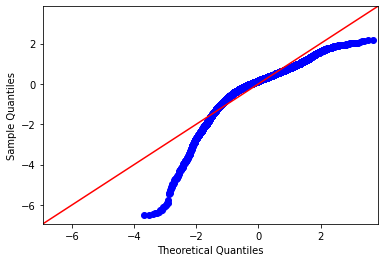

In [17]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

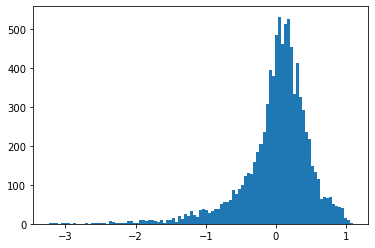

In [18]:
plt.hist(residuals, bins='auto');

# Transform

In [ ]:
df_log = model_df.copy()

In [ ]:
df_log.hist(figsize=(15,12));

In [ ]:
df_log[['Rating', 'Reviews', 'Size', 'Installs']].hist(figsize=(15,12));

All the continuous variable are very skewed. Major outliers with Reviews and Installs. 

In [ ]:
df_log['log_Rating'] = np.log(df_log['Rating'])
df_log[['Rating', 'log_Rating']].hist(figsize=(12,5));

df_log['log_Reviews'] = np.log(df_log['Reviews'])
df_log[['Reviews', 'log_Reviews']].hist(figsize=(12,5));

df_log['log_Size'] = np.log(df_log['Size'])
df_log[['Size', 'log_Size']].hist(figsize=(12,5));

df_log['log_Installs'] = np.log(df_log['Installs'])
df_log[['Installs', 'log_Installs']].hist(figsize=(12,5));

In [ ]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [ ]:
df_log_norm = df_log[['log_Installs', 'log_Size', 'log_Reviews']]

In [ ]:
df_log_norm = df_log_norm.apply(normalize)
df_log_norm.hist(figsize=(10,10));

In [ ]:
df_log['log_Installs'] = df_log_norm['log_Installs']
df_log['log_Size'] = df_log_norm['log_Size']
df_log['log_Reviews'] = df_log_norm['log_Reviews']

In [ ]:
df_log.info()

In [ ]:
df_log = df_log.drop(['log_Rating', 'Reviews', 'Installs', 'Size'], axis=1)

# Linear Regression

In [ ]:
outcome = 'Rating'
predictors = df_log.drop(['Rating'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, df_log).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

In [ ]:
y = df_log['Rating']
X = df_log.drop('Rating', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

In [ ]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
plt.hist(residuals, bins='auto');

# KNeighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=200,weights='distance')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

# Random Forest